#Support Vector Machines

Separate classes into two groups

Hyperplace, linearly maximizes the distance between the two groups. maximum margin of difference

Kernel trick, non-linear maximization of distance between two groups

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [8]:
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [15]:
# create model
model = SVC()

# split data
xtrain, xtest, ytrain, ytest = train_test_split(x,y) # play with test_size=0.4 and random_state=3

In [16]:
# fit the model
model.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
# lest see how well the model did
predicted = model.predict(xtest)
expected = ytest

In [18]:
print metrics.accuracy_score(expected,predicted)

0.947368421053


#Lets explore kernel type for non linear classification

In [26]:
from sklearn import svm

x = iris.data[:,:2]
y = iris.target

# regularization parameter. regularization between all the kernel methods
C = 1.0

# regular linear SVC
svc = svm.SVC(kernel = 'linear',C=C).fit(x,y)

# Gaussian Radial basis function
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(x,y)

# linear SVC
lin_svc = svm.LinearSVC(C=C).fit(x,y)

# polynomial SVC
poly_svc = svm.SVC(kernel='poly',C=C).fit(x,y)

Now we have 4 models to compare!

In [28]:
# set up step size
h = 0.02

# set max and min
x_min = x[:,0].min() -1
x_max = x[:,0].max() +1


y_min = x[:,1].min() -1
y_max = x[:,1].max() +1

In [30]:
# create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max,h), np.arange(y_min, y_max,h))

# give titles
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

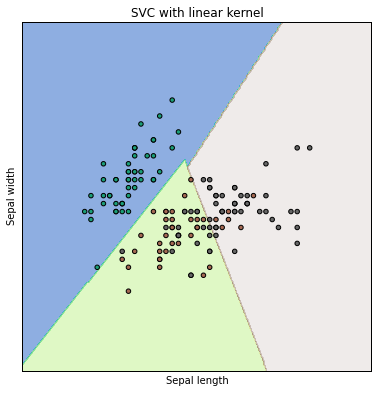

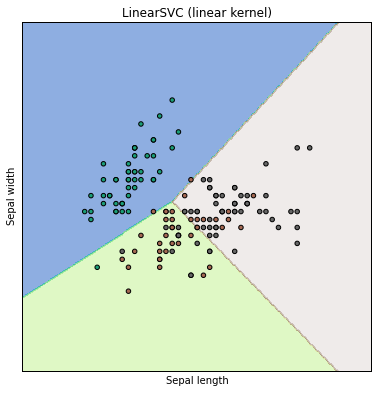

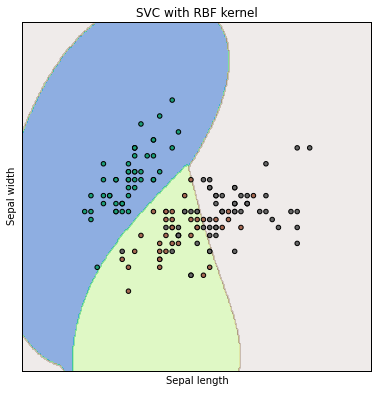

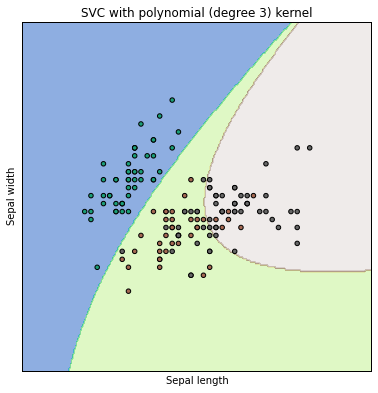

In [35]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5)

    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()    

Part 6: Additional Resources
1.) Microsoft Research Paper SVM Tutorial
2.) StatSoft Online Textbook
3.) Sci Kit Learn Documentation
4.) Wikipedia
5.) Columbia Lecture Slides
6.) Andrew Ng's Class Notes